In [8]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Polynomial Regression

#### 1. Data_before

In [2]:
data_old = pd.read_csv('~/Documents/GitHub/RGTM/Cleaned/MODEL_halfmileavg.csv', header = 0)

# Fill in missing values with median
data_old['halfMileAvgPrice6mo'] = data_old['halfMileAvgPrice6mo'].fillna(data_old['halfMileAvgPrice6mo'].median())

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

X = data_old.drop('SalePrice', 1)
y = data_old['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

for i in range(1,4):
    poly = PolynomialFeatures(degree = i)
    X_train_poly = poly.fit_transform(X_train)
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    
    # predicting on test data-set
    X_test_poly = poly.fit_transform(X_test)
    predictions_poly = poly_model.predict(X_test_poly)   
    print('degree '+ str(i), r2_score(y_test, predictions_poly))

degree 1 0.44458145697693474


KeyboardInterrupt: 

#### 2. Data_after

In [4]:
data = pd.read_csv('~/Documents/GitHub/RGTM/Cleaned/data_final_model_run3.csv', header = 0, index_col = 0)

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

data = data[data.Beds < 6].copy(deep = True)
# year built included
X = data.drop(['INC_ID', 'SalePrice', 'AvgPriceZipCode1Yr'], 1)

y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

poly = PolynomialFeatures(degree = 1)
X_train_poly = poly.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# predicting on test data-set
X_test_poly = poly.fit_transform(X_test)
predictions_poly = poly_model.predict(X_test_poly)   
print('degree '+ str(i), round(r2_score(y_test, predictions_poly), 3))

df = X_test.reset_index().merge(pd.DataFrame({"y":y_test}).reset_index(), on="index", how="left")
df = df.rename(columns={"index" : "original_index"})
df = df.reset_index().merge(
    pd.DataFrame({"pred":predictions_poly}).reset_index(), on="index", how="left")
df['Error'] = df['y'] - df['pred']
df['Error %'] = np.abs(df['Error']/df['y'])
df
# df.to_csv('linreg_predictions.csv')

degree 3 0.674


,index,original_index,Baths,Beds,NumComplaints3moPointOneMile,NumFelonies3moPointOneMile,min_dist_subway,SalesVolume,minDistSelectedParks,Floor_Proxy,...,BuildCat_CONDOS,BuildCat_COOPS,BuildCat_OTHERS,BY_Post_2000,BY_1980_2000,BY_Pre_1980,y,pred,Error,Error %
0,0,5077,2,2,34,7,0.095533,852,0.527585,10,...,0,1,0,0,0,1,2500000,1.815951e+06,6.840494e+05,0.273620
1,1,6847,1,1,0,9,0.062024,865,0.354324,2,...,1,0,0,0,0,1,1040000,1.117368e+06,-7.736840e+04,0.074393
2,2,2636,1,2,2,18,0.161900,1410,0.417522,0,...,0,1,0,0,0,1,615000,9.645243e+05,-3.495243e+05,0.568332
3,3,5948,1,2,0,35,0.052974,738,0.042357,4,...,0,1,0,0,0,1,525000,9.131178e+05,-3.881178e+05,0.739272
4,4,3891,1,2,17,34,0.081538,1194,0.353141,10,...,0,1,0,0,0,1,1000000,1.116339e+06,-1.163392e+05,0.116339
5,5,201,1,2,0,14,0.247797,1431,0.303227,2,...,0,1,0,0,0,1,1275000,9.226800e+05,3.523200e+05,0.276329
6,6,2710,2,2,7,8,0.169558,1125,0.098474,1,...,0,1,0,0,0,1,1150000,1.983962e+06,-8.339621e+05,0.725184
7,7,7762,2,2,0,0,0.217893,1503,0.541940,6,...,0,1,0,0,0,1,1275000,1.893811e+06,-6.188114e+05,0.485342
8,8,5172,2,2,0,7,0.176840,810,3.823897,4,...,0,1,0,0,0,1,659000,1.240243e+06,-5.812431e+05,0.882008
9,9,1038,1,2,0,17,0.120487,932,0.105542,34,...,0,1,0,0,0,1,1150000,1.095830e+06,5.417018e+04,0.047105


for degree 3 polynomial, negative values

### Poly with scaled data

In [128]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# year built included
X = data.drop(['INC_ID', 'SalePrice', 'AvgPriceZipCode1Yr'], 1)
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scl = preprocessing.StandardScaler()
X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

# for i in range(1,4):
#     poly = PolynomialFeatures(degree = i)
#     X_train_poly = poly.fit_transform(X_train)
#     poly_model = LinearRegression()
#     poly_model.fit(X_train_poly, y_train)
    
#     # predicting on test data-set
#     X_test_poly = poly.fit_transform(X_test)
#     predictions_poly = poly_model.predict(X_test_poly)   
#     print('degree '+ str(i), r2_score(y_test, predictions_poly))


poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# predicting on test data-set
X_test_poly = poly.fit_transform(X_test)
predictions_poly = poly_model.predict(X_test_poly)   
print('degree '+ str(i), round(r2_score(y_test, predictions_poly), 3))

degree 3 0.641


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

X = data.drop(['INC_ID','SalePrice', 'MedianSalesPrice'], 1)
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

for i in range(1,4):
    poly = PolynomialFeatures(degree = i)
    X_train_poly = poly.fit_transform(X_train)
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    
    # predicting on test data-set
    X_test_poly = poly.fit_transform(X_test)
    predictions_poly = poly_model.predict(X_test_poly)   
    print('degree '+ str(i), r2_score(y_test, predictions_poly))

### K-nearest neighbors Regressor

In [15]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

data = data[data.Beds < 6].copy(deep = True)
X = data.drop(['INC_ID', 'SalePrice', 'AvgPriceZipCode1Yr'], 1)
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

regressor = KNeighborsRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
df = X_test.reset_index().merge(pd.DataFrame({"y":y_test}).reset_index(), on="index", how="left")
df = df.rename(columns={"index" : "original_index"})
df = df.reset_index().merge(
    pd.DataFrame({"pred":y_pred}).reset_index(), on="index", how="left")
df['Error'] = df['y'] - df['pred']
df['Error %'] = np.abs(df['Error']/df['y'])
df
# df.to_csv('knn_regressor_predictions.csv')

In [7]:
print(r2_score(y_test, y_pred))

0.7138624196299277


In [147]:
from sklearn.linear_model import Lasso
X = data.drop(['INC_ID', 'SalePrice', 'AvgPriceZipCode1Yr'], 1)
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#clf = LinearRegression()
clf = Lasso()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

from sklearn.metrics import r2_score

print("Train acc: " , r2_score(y_train, y_train_pred))
print("Test acc: ", r2_score(y_test, y_pred))

from sklearn.metrics import mean_squared_error

print("Train acc: " , clf.score(X_train, y_train))
print("Test acc: ", clf.score(X_test, y_test))

Train acc:  0.5822636648774976
Test acc:  0.6517454962414659
Train acc:  0.5822636648774976
Test acc:  0.6517454962414659


1351516.3180072724

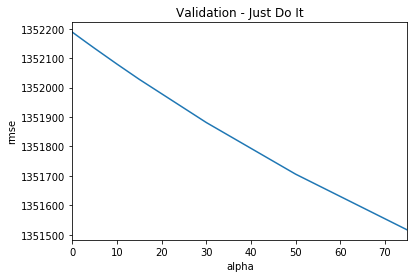

In [10]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

model_ridge = Ridge()

alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")
cv_ridge.min()

### Lasso

In [14]:
X_train

array([[-0.54524879, -1.35188608, -0.06651458, ..., -0.2284161 ,
        -0.20171281,  0.31195235],
       [-0.54524879,  0.37822014,  0.00585439, ..., -0.2284161 ,
        -0.20171281,  0.31195235],
       [-0.54524879,  0.37822014,  0.6571751 , ..., -0.2284161 ,
        -0.20171281,  0.31195235],
       ...,
       [-0.54524879, -0.48683297, -0.50072839, ..., -0.2284161 ,
        -0.20171281,  0.31195235],
       [-0.54524879, -0.48683297, -0.21125252, ..., -0.2284161 ,
        -0.20171281,  0.31195235],
       [-0.54524879, -0.48683297, -0.50072839, ..., -0.2284161 ,
        -0.20171281,  0.31195235]])

In [15]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)
rmse_cv(model_lasso).mean()
coef = pd.Series(model_lasso.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 16 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

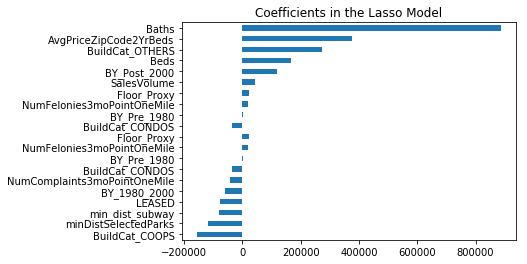

In [16]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

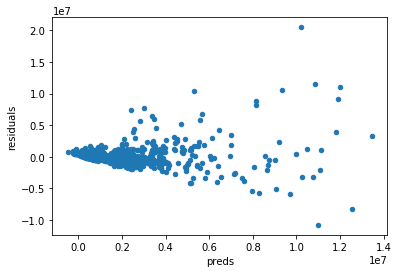

In [17]:
#let's look at the residuals as well:
preds = pd.DataFrame({"preds": model_lasso.predict(X_test), "true":y_test})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

### xgboost model

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

X = data.drop(['INC_ID', 'SalePrice', 'AvgPriceZipCode1Yr'], 1)
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

In [61]:
X = data.drop(['SalePrice', 'MedianSalesPrice'], 1)
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


poly = PolynomialFeatures(degree = 1)
X_train_poly = poly.fit_transform(X_train.drop('INC_ID', 1))
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# predicting on test data-set
X_test_poly = poly.fit_transform(X_test.drop('INC_ID', 1))
predictions_poly = poly_model.predict(X_test_poly)   
print(r2_score(y_test, predictions_poly))

0.6336114964826369


In [62]:
# poly_1 = PolynomialFeatures(degree = 1)
# X_train_poly = poly_1.fit_transform(X_train)
# poly_model = LinearRegression()
# poly_model.fit(X_train_poly, y_train)

# # predicting on test data-set
# X_test_poly = poly_1.fit_transform(X_test)
# predictions_poly = poly_model.predict(X_test_poly)   
# print(r2_score(y_test, predictions_poly))

In [64]:
df = pd.DataFrame({'Test set': y_test, 'Prediction': np.round(predictions_poly).astype(int)}).reset_index(drop=True)
df['Error'] = df['Test set'] - df['Prediction']
df['Error %'] = np.abs(df['Error']/df['Test set'])
df

,Test set,Prediction,Error,Error %
0,718300,459198,259102,0.360716
1,854500,495038,359462,0.420669
2,12370800,6159953,6210847,0.502057
3,1725000,3460590,-1735590,1.006139
4,499000,850429,-351429,0.704267
5,385000,613888,-228888,0.594514
6,2100000,2403508,-303508,0.144528
7,560000,897512,-337512,0.602700
8,390000,653810,-263810,0.676436
9,740000,603868,136132,0.183962


In [58]:
# pair the feature names with the coefficients
# list(zip(X.columns, poly_model.coef_))

In [65]:
df = X_test.reset_index().merge(pd.DataFrame({"y":y_test}).reset_index(), on="index", how="left")
df = df.rename(columns={"index" : "original_index"})
df = df.reset_index().merge(
    pd.DataFrame({"pred":predictions_poly}).reset_index(), on="index", how="left")

In [68]:
df.to_clipboard()

In [45]:
predictions_poly.shape

(1574,)

In [ ]:
scl = preprocessing.StandardScaler()
